In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.metrics.pairwise import linear_kernel

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("C:/Users/cheryl/OneDrive - Bina Nusantara/Documents/sem 4/modep/Final Project/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['show_id'].value_counts()

show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64

In [6]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [7]:
df['title'].value_counts()

title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64

In [8]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [9]:
df['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [10]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [11]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [12]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [13]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [14]:
df['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [15]:
df['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [16]:
df['description'].value_counts()

description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
                                                                                                                                                            ..
Sent away to evade an arranged mar

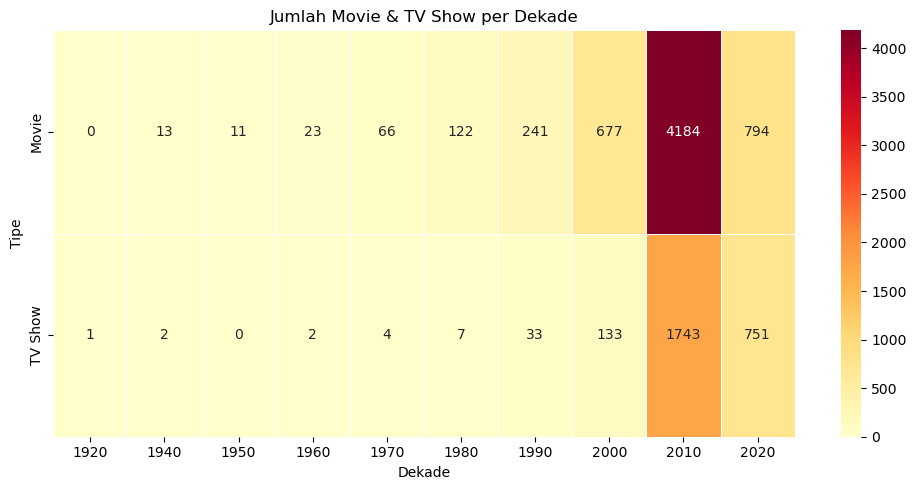

In [17]:
df['decade'] = (df['release_year'] // 10) * 10  # Kelompokkan ke dekade

decade_type = df.groupby(['decade', 'type']).size().unstack(fill_value=0)

# Visualisasikan heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(decade_type.T, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Jumlah Movie & TV Show per Dekade')
plt.xlabel('Dekade')
plt.ylabel('Tipe')
plt.tight_layout()
plt.show()



Text(0, 0.5, 'Genre')

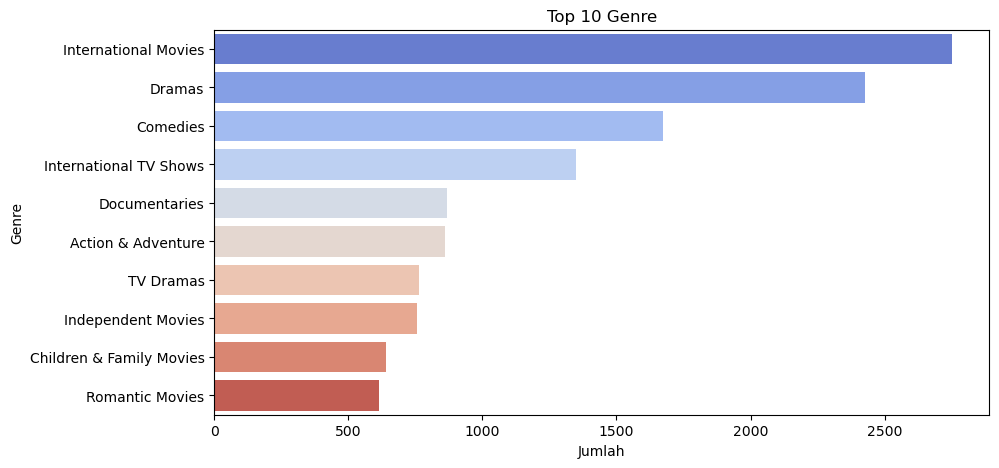

In [18]:
# 4. Top 10 Genre (listed_in)
plt.figure(figsize=(10, 5))
# Genre bisa lebih dari 1, jadi perlu explode
df_genre = df['listed_in'].dropna().str.split(', ').explode()
top_genre = df_genre.value_counts().nlargest(10)
sns.barplot(y=top_genre.index, x=top_genre.values, palette='coolwarm')
plt.title('Top 10 Genre')
plt.xlabel('Jumlah')
plt.ylabel('Genre')

Text(0, 0.5, 'Negara')

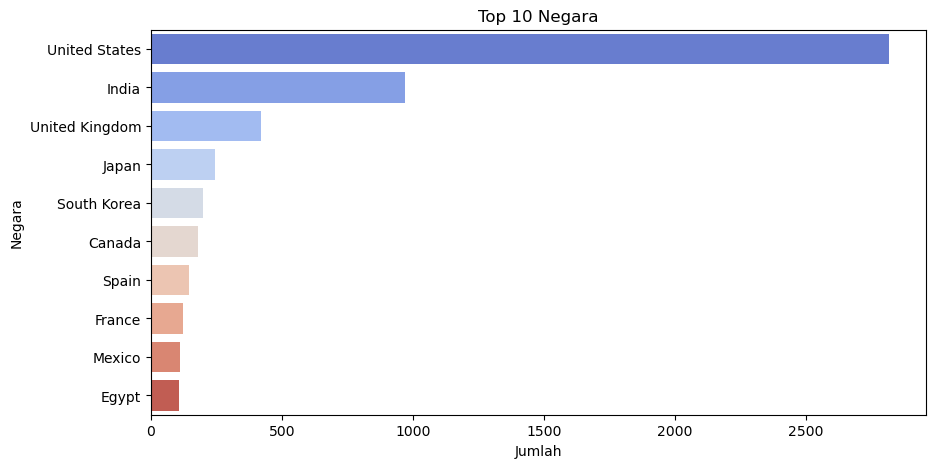

In [19]:
plt.figure(figsize=(10, 5))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title('Top 10 Negara')
plt.xlabel('Jumlah')
plt.ylabel('Negara')

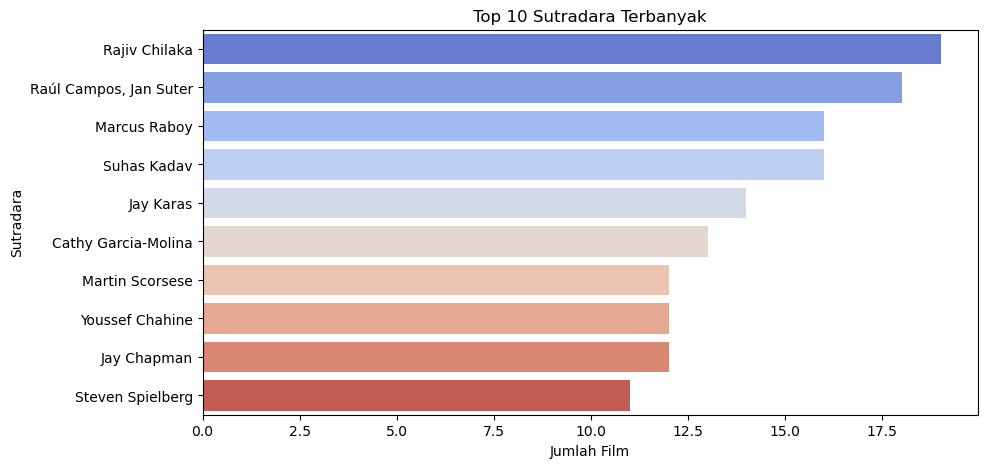

In [20]:
# top 10 director
plt.figure(figsize=(10, 5))
top_directors = df['director'].dropna().value_counts().nlargest(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette='coolwarm')
plt.title('Top 10 Sutradara Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Sutradara')
plt.show()


In [21]:
# duplicate data in title
title_duplicates = df['title'].duplicated().sum()
print(f"Duplikat di Title: {title_duplicates}")

Duplikat di Title: 0


## Checking Null Value

In [22]:
miss_value = df.isnull().sum()
miss_value

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
decade             0
dtype: int64

## Prepocessing

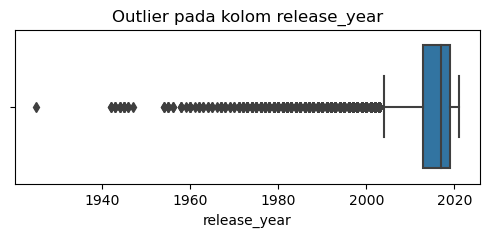

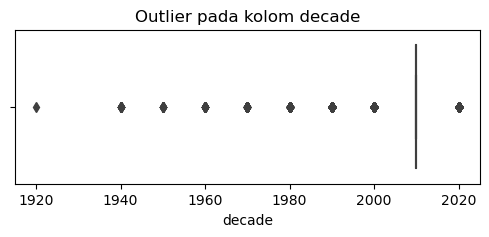

In [23]:
# show outlier
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier pada kolom {col}')
    plt.show()

In [24]:
df['description'] = df['description'].fillna('')
df['cast'] = df['cast'].fillna('')
df['director'] = df['director'].fillna('')
df['cast'] = df['cast'].apply(lambda x: [i.strip().lower().replace(' ', '') for i in x.split(',')[:3]]) 
df['genres'] = df['listed_in'].fillna('').apply(lambda x: [g.strip().lower().replace(' ', '') for g in x.split(',')])
df['director'] = df['director'].apply(lambda x: [x.strip().lower().replace(' ', '')] if x else [])


In [25]:
def create_soup(x):
    return ' '.join(x['genres'] + x['cast'] + x['director']) + ' ' + x['type']

df['soup'] = df.apply(create_soup, axis=1)


In [26]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['soup'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
titles = df['title']


In [33]:
def get_recommendations(title, topn=5):
    idx = indices.get(title)
    if idx is None:
        return f"**{title}** tidak ditemukan "
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:topn+1]
    rec_idxs = [i[0] for i in sim_scores]
    return df[['title','type','release_year','description','genres']].iloc[rec_idxs]


In [34]:
print(get_recommendations('Stranger Things', topn=5))

                               title     type  release_year  \
6953                           Helix  TV Show          2015   
2190            The Umbrella Academy  TV Show          2020   
2303                     Warrior Nun  TV Show          2020   
1473  Chilling Adventures of Sabrina  TV Show          2020   
2297                  JU-ON: Origins  TV Show          2020   

                                            description  \
6953  While investigating a possible outbreak at an ...   
2190  Reunited by their father's death, estranged si...   
2303  After waking up in a morgue, an orphaned teen ...   
1473  Magic and mischief collide as half-human, half...   
2297  A paranormal researcher searches obsessively f...   

                                                 genres  
6953          [tvhorror, tvmysteries, tvsci-fi&fantasy]  
2190  [tvaction&adventure, tvmysteries, tvsci-fi&fan...  
2303  [tvaction&adventure, tvmysteries, tvsci-fi&fan...  
1473          [tvhorror, tvmysteri

In [35]:
# Simpan dictionary ini. 
with open('netflix_df.pkl', 'wb') as f:
    pickle.dump(df, f)
